# Auswertung QM B

This script provides a data processing for the ZIF Simulation (QM Part B)

In [212]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

from scipy.optimize import curve_fit

from scipy.integrate import simpson
from scipy.integrate import cumulative_trapezoid

from scipy.stats import linregress

Important notes

+ We have a 1ns run with 500 ps for each run

# Analysis Hydrogen Loading 8

### Einstein Relation

Here we calculate the mean squared displacment (MSD) of the hydrogen molecule. What we need is the MSD file 

5000.0


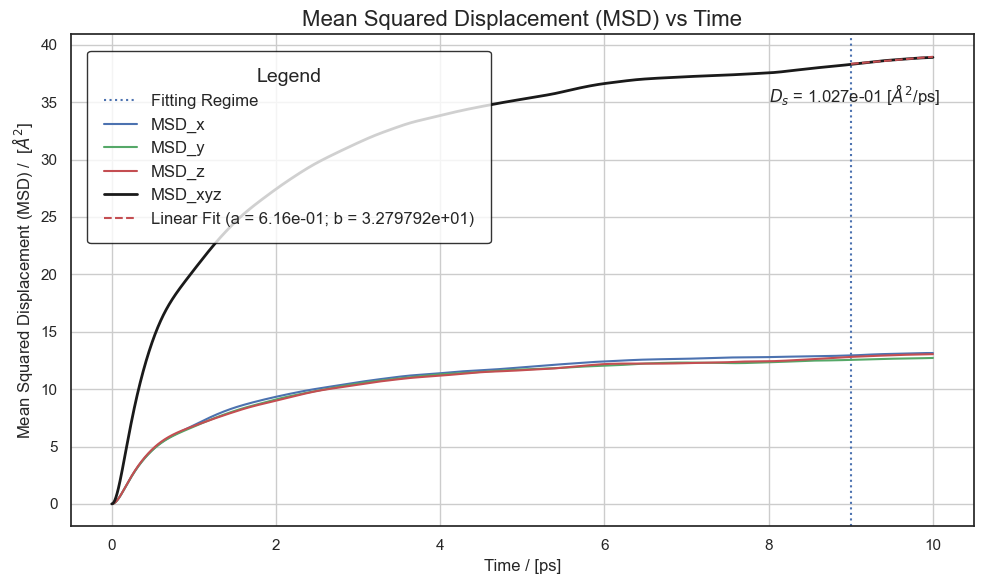

In [213]:
data = np.genfromtxt("data_zif8/diff.out")
steps = data[:,0]
# Calculate the step time
time_per_step = 1/np.max(steps)

print(np.max(steps))
# Transform x axis into pS
time = steps * 0.002
MSD_x = data[:,1]
MSD_y = data[:,2]
MSD_z = data[:,3]
MSD_xyz = MSD_x + MSD_y + MSD_z


## further fit some data

def linear_regression(x,a,b):
  return a*x + b

popt, pcov = curve_fit(linear_regression,time[-500:],MSD_xyz[-500:])

d_einstein = popt[0] / 6 

# extract fit parameters and b

a_fit = popt[0]
b_fit = popt[1]

fitted_line = linear_regression(time[-500:],a_fit,b_fit)


df = pd.DataFrame({
    'Time': time,
    'MSD_x': MSD_x,
    'MSD_y': MSD_y,
    'MSD_z': MSD_z,
    'MSD_xyz': MSD_xyz
})



# Set the plotting style
sns.set(style="white")

# Create the plot
plt.figure(figsize=(10, 6))

plt.axvline(x=time[-500], color='b', linestyle=':', label="Fitting Regime")

# Plot each MSD component
sns.lineplot(data=df, x='Time', y='MSD_x', label='MSD_x', color='b')
sns.lineplot(data=df, x='Time', y='MSD_y', label='MSD_y', color='g')
sns.lineplot(data=df, x='Time', y='MSD_z', label='MSD_z', color='r')
sns.lineplot(data=df, x='Time', y='MSD_xyz', label='MSD_xyz', color='k', linewidth=2)

# Plot the Fit and D
plt.plot(time[-500:], fitted_line , label=f'Linear Fit (a = {a_fit:.2e}; b = {b_fit:2e})', color='r', linestyle='--')

plt.text(8,35, f"$D_s$ = {d_einstein:.3e} [$\AA^2$/ps]")

# Customize the plot
plt.title('Mean Squared Displacement (MSD) vs Time', fontsize=16)
plt.xlabel('Time / [ps]', fontsize=12)
plt.ylabel(r'Mean Squared Displacement (MSD) /  [$\AA^2$]', fontsize=12)
plt.legend(
    title="Legend", 
    loc='upper left', 
    frameon=True,   # Enable the box around the legend
    facecolor='white',  # Background color of the box
    edgecolor='black',  # Border color of the box
    fontsize=12,  # Font size for legend text
    title_fontsize=14,  # Font size for the title in the legend
    borderpad=1,  # Padding between the legend content and the box
    borderaxespad=1  # Padding between the legend and the plot
)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("MSD_with_einstein_fit.png")
plt.show()


### Green Kubo 

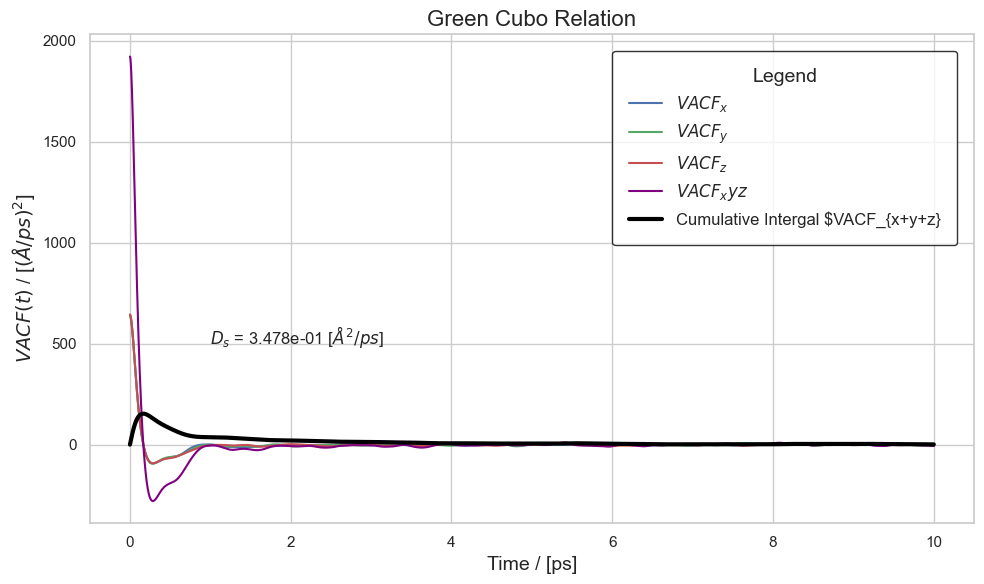

In [214]:


data = np.genfromtxt("data_zif8/green_kubo.out")
time = data[:,0]
VACF_x = data[:,1]
VACF_y = data[:,2]
VACF_z = data[:,3]
VACF_xyz = data[:,4]

# When we apply our integral

integral_VACF_xyz = simpson(VACF_xyz, x=time)
cumulative_integral = cumulative_trapezoid(VACF_xyz, time, initial=0)

# Calculate Green Kubo
d_green_kubo = integral_VACF_xyz / 3

# Create the plot using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot the Individual Components

# Plot the VACF components
sns.lineplot(x=time, y=VACF_x, label="$VACF_x$", color='b', linestyle='-')
sns.lineplot(x=time, y=VACF_y, label="$VACF_y$", color='g', linestyle='-')
sns.lineplot(x=time, y=VACF_z, label="$VACF_z$", color='r', linestyle='-')
sns.lineplot(x=time, y=VACF_xyz, label="$VACF_xyz$", color='purple', linestyle='-')

# Plot cumulative integral
sns.lineplot(x=time, y=cumulative_integral, label="Cumulative Intergal $VACF_{x+y+z}", color='black',linewidth = 3)

plt.text(1,500, f"$D_s$ = {d_green_kubo:.3e} [$\AA^2 /ps$]")

# Plot Simpson's rule result

# Add labels and title
plt.title("Green Cubo Relation", fontsize=16)
plt.xlabel("Time / [ps]", fontsize=14)
plt.ylabel("$VACF(t)$ / [$(\AA / ps)^2$]", fontsize=14)

plt.legend(
    title="Legend", 
    loc='upper right', 
    frameon=True,   # Enable the box around the legend
    facecolor='white',  # Background color of the box
    edgecolor='black',  # Border color of the box
    fontsize=12,  # Font size for legend text
    title_fontsize=14,  # Font size for the title in the legend
    borderpad=1,  # Padding between the legend content and the box
    borderaxespad=1  # Padding between the legend and the plot
)

# Show plot
plt.tight_layout()
plt.show()

### Activation Energy

The Diffusion Coefficient is directly depending on the activation energy $E_a$ by an exponential decay

$D_s = D_0 e^{\frac{E_a}{RT}}$

0   -20.943017
1   -20.830635
2   -20.734392
3   -20.651045
4   -20.578165
Name: Temperature (K), dtype: float64


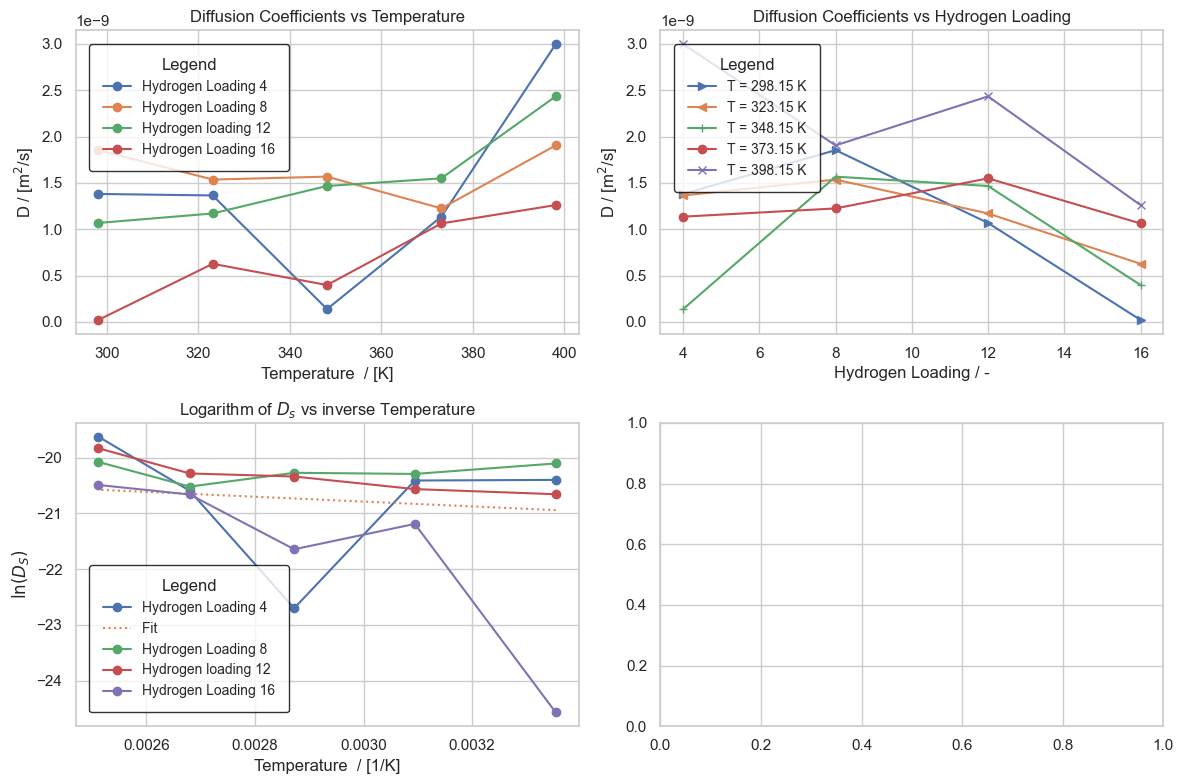

In [ ]:
data = {
    "Temperature (K)": [298.15, 323.15, 348.15, 373.15, 398.15],
    "D4": [1.3805E-9, 0.0000000013645, 0.00000000013824, 0.0000000011356, 0.0000000029965],
    "D8": [0.0000000018536, 0.0000000015359, 0.0000000015675, 0.0000000012243, 0.0000000019045],
    "D12": [0.0000000010678, 0.00000000117, 0.0000000014665, 0.0000000015493, 0.0000000024336],
    "D16": [2.1358E-11, 0.0000000006268, 0.00000000039789, 0.0000000010624,  0.0000000012605 ]
}

# Create DataFrame
df = pd.DataFrame(data)

data_loading = {
    "n": [4,8,12,16],
    "T_298": [1.3805E-9, 0.0000000018536,0.0000000010678, 2.1358E-11],
    "T_323": [0.0000000013645,0.0000000015359, 0.00000000117, 0.0000000006268],
    "T_348": [ 0.00000000013824, 0.0000000015675, 0.0000000014665, 0.00000000039789],
    "T_373": [0.0000000011356,0.0000000012243, 0.0000000015493, 0.0000000010624],
    "T_398": [0.0000000029965, 0.0000000019045, 0.0000000024336, 0.0000000012605 ]
}

df2 = pd.DataFrame(data_loading)
# Basically we do 4 subplots here

fig, axs = plt.subplots(2, 2, figsize=(12, 8))


# First Subplot

axs[0,0].plot(df["Temperature (K)"], df["D4"], label="Hydrogen Loading 4", marker='o')
axs[0,0].plot(df["Temperature (K)"], df["D8"], label="Hydrogen Loading 8", marker='o')
axs[0,0].plot(df["Temperature (K)"], df["D12"], label="Hydrogen loading 12", marker='o')
axs[0,0].plot(df["Temperature (K)"], df["D16"], label="Hydrogen Loading 16", marker='o')
axs[0,0].set_xlabel('Temperature  / [K]')
axs[0,0].set_ylabel('D / [m$^2$/s]')
axs[0,0].set_title('Diffusion Coefficients vs Temperature')

axs[0,0].legend(
    title="Legend", 
    loc='upper left', 
    frameon=True,   # Enable the box around the legend
    facecolor='white',  # Background color of the box
    edgecolor='black',  # Border color of the box
    fontsize=10,  # Font size for legend text
    title_fontsize=12,  # Font size for the title in the legend
    borderpad=1,  # Padding between the legend content and the box
    borderaxespad=1  # Padding between the legend and the plot
)

# For the Second Subplot we Do the Diffusion Coefficient against the hydrogen loading 

axs[0,1].plot(df2["n"],df2["T_298"], label="T = 298.15 K", marker =">")
axs[0,1].plot(df2["n"],df2["T_323"], label="T = 323.15 K", marker ="<")
axs[0,1].plot(df2["n"], df2["T_348"], label="T = 348.15 K", marker = "+")
axs[0,1].plot(df2["n"], df2["T_373"], label="T = 373.15 K", marker = "o")
axs[0,1].plot(df2["n"], df2["T_398"], label="T = 398.15 K", marker = "x")
axs[0,1].set_xlabel('Hydrogen Loading / -')
axs[0,1].set_ylabel('D / [m$^2$/s]')
axs[0,1].set_title('Diffusion Coefficients vs Hydrogen Loading')
axs[0,1].legend(
    title="Legend", 
    loc='upper left', 
    frameon=True,   # Enable the box around the legend
    facecolor='white',  # Background color of the box
    edgecolor='black',  # Border color of the box
    fontsize=10,  # Font size for legend text
    title_fontsize=12,  # Font size for the title in the legend
    borderpad=1,  # Padding between the legend content and the box
    borderaxespad=1  # Padding between the legend and the plot
)


# For the fourth subplot we do  1/T with ln of Ds

df["D4"] = np.log(df["D4"])
df["D8"] = np.log(df["D8"])
df["D12"] = np.log(df["D12"])
df["D16"] = np.log(df["D16"])
df["Temperature (K)"] = 1/df["Temperature (K)"]


# Linear FIT THIS SHIIITTTT

slope1, intercept1, r_value1, p_value1, std_err = linregress(df["Temperature (K)"],df["D4"])


fit_1 = slope1*df["Temperature (K)"] + intercept1

print(fit_1)



axs[1,0].plot(df["Temperature (K)"], df["D4"], label="Hydrogen Loading 4", marker='o',color="blue")

axs[1,0].plot(df["Temperature (K)"],fit_1,linestyle="dotted", label="Fit $H=4$, " )


axs[1,0].plot(df["Temperature (K)"], df["D8"], label="Hydrogen Loading 8", marker='o')
axs[1,0].plot(df["Temperature (K)"], df["D12"], label="Hydrogen loading 12", marker='o')
axs[1,0].plot(df["Temperature (K)"], df["D16"], label="Hydrogen Loading 16", marker='o')
axs[1,0].set_xlabel('Temperature  / [1/K]')
axs[1,0].set_ylabel('$\ln(D_S)$')
axs[1,0].set_title('Logarithm of $D_s$ vs inverse Temperature')

axs[1,0].legend(
    title="Legend", 
    loc='lower left', 
    frameon=True,   # Enable the box around the legend
    facecolor='white',  # Background color of the box
    edgecolor='black',  # Border color of the box
    fontsize=10,  # Font size for legend text
    title_fontsize=12,  # Font size for the title in the legend
    borderpad=1,  # Padding between the legend content and the box
    borderaxespad=1  # Padding between the legend and the plot
)

plt.tight_layout()
plt.show()